In [2]:
import obspy
from obspy import read, UTCDateTime
from obspy.io.xseed import Parser
from obspy.signal import PPSD
import numpy as np
import matplotlib.pyplot as plt
from obspy.imaging.cm import pqlx
import os
from obspy.clients.fdsn import Client

In [3]:
print("""ZE 2303 GPZ""")

ZE 2303 GPZ


ZE.2303..GPZ
done
traces added
Data accumulated for 3-day period starting from 2023-07-12T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 7, 12, 19, 35, 57), UTCDateTime(2023, 7, 12, 20, 5, 57), UTCDateTime(2023, 7, 12, 20, 35, 57), UTCDateTime(2023, 7, 12, 21, 5, 57), UTCDateTime(2023, 7, 12, 21, 35, 57), UTCDateTime(2023, 7, 12, 22, 5, 57), UTCDateTime(2023, 7, 12, 22, 35, 57), UTCDateTime(2023, 7, 12, 23, 5, 57), UTCDateTime(2023, 7, 12, 23, 35, 57), UTCDateTime(2023, 7, 13, 0, 5, 57)]




<Figure size 1000x600 with 0 Axes>

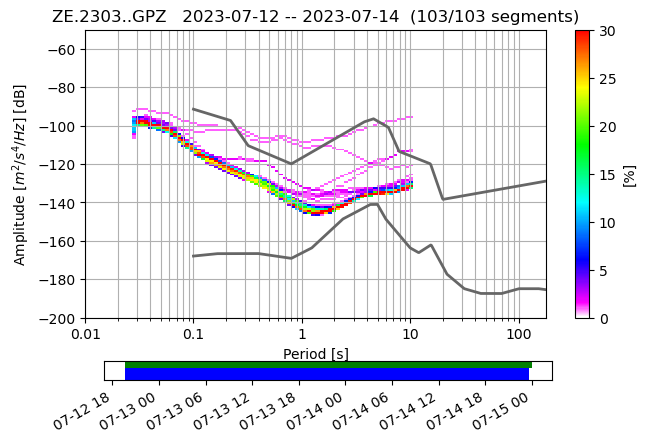

shape of psd values:  (103, 69)
[array([ -92.56034 ,  -91.44671 ,  -91.79296 ,  -91.96892 ,  -92.37233 ,
        -92.776306,  -93.172226,  -93.58172 ,  -93.932335,  -94.7394  ,
        -95.563835,  -96.46401 ,  -97.1143  ,  -97.64443 ,  -98.16742 ,
        -98.62924 ,  -99.09524 ,  -99.46759 ,  -99.60967 ,  -99.74625 ,
        -99.958145, -100.096855, -100.16065 , -100.20193 , -100.27186 ,
       -100.67063 , -101.50271 , -102.45868 , -103.55395 , -104.79035 ,
       -105.7153  , -106.19128 , -106.52737 , -106.5053  , -106.340454,
       -105.997536, -105.8907  , -105.97201 , -106.40254 , -107.02275 ,
       -107.55411 , -108.1086  , -108.26608 , -108.021416, -107.67872 ,
       -107.61791 , -107.21812 , -106.920204, -106.536194, -106.098755,
       -105.80882 , -105.68249 , -105.20122 , -104.313194, -103.54313 ,
       -102.9799  , -102.30086 , -101.4695  , -100.44741 ,  -99.38703 ,
        -98.64714 ,  -98.10579 ,  -97.672195,  -97.30949 ,  -97.11516 ,
        -96.81494 ,  -96.49515 

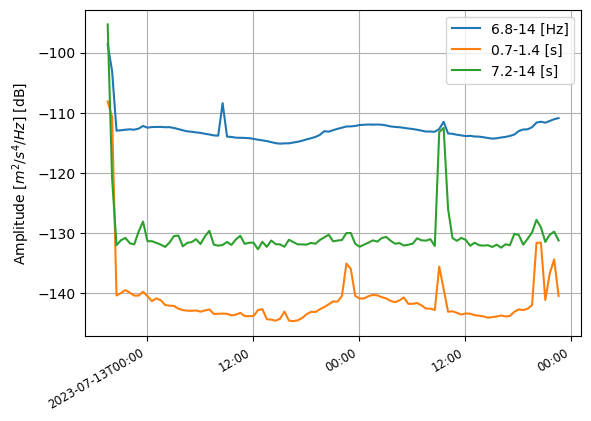

In [40]:
# define start and end time
t1 = UTCDateTime(2023, 7, 12)  # Start time
t2 = UTCDateTime(2023, 7, 15)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'
stas = ['ZE.2303..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# merge traces - avoids duplicates
S.merge(method=1)

S.resample(50)

# print('length of trace:', len(S[0]))
# if len(S[0]) >= 50 * (tr.stats.endtime - tr.stats.starttime):  # 50 samples per second * # of sec
#     print('Resampling')
#     S.resample(50) # Resampled rate for final analysis. Note: Consider Nyquist criterion
# else:
#     print("Trace too short for resampling at 50 Hz")
#     S.resample(50)

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

psd_values = ppsd.psd_values
print("shape of psd values: ", np.shape(psd_values))
print(psd_values[0:1]) # first branch

# plotting time series of PSD values
ppsd.plot_temporal([0.1,1,10])


ZE.2303..GPZ
Resampling
done
traces added
Data accumulated for 3-day period starting from 2023-07-15T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 7, 15, 0, 0), UTCDateTime(2023, 7, 15, 0, 30), UTCDateTime(2023, 7, 15, 1, 0), UTCDateTime(2023, 7, 15, 1, 30), UTCDateTime(2023, 7, 15, 2, 0), UTCDateTime(2023, 7, 15, 2, 30), UTCDateTime(2023, 7, 15, 3, 0), UTCDateTime(2023, 7, 15, 3, 30), UTCDateTime(2023, 7, 15, 4, 0), UTCDateTime(2023, 7, 15, 4, 30)]




<Figure size 1000x600 with 0 Axes>

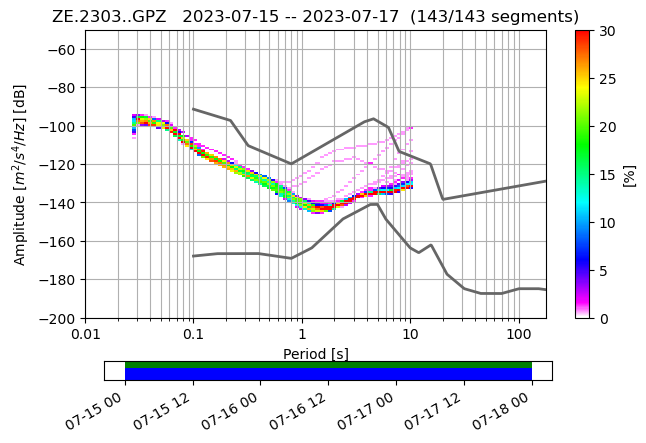

shape of psd values:  (143, 69)
[array([ -96.75237 ,  -95.02099 ,  -95.280685,  -95.673454,  -96.21271 ,
        -96.8549  ,  -97.54169 ,  -98.206635,  -98.87665 , -100.35056 ,
       -102.01433 , -103.79306 , -105.58216 , -107.31726 , -108.94369 ,
       -110.53399 , -112.000336, -113.343994, -114.5675  , -115.70355 ,
       -116.73868 , -117.70972 , -118.657684, -119.52148 , -120.42418 ,
       -121.27693 , -122.13446 , -122.96156 , -123.85571 , -124.78612 ,
       -125.70383 , -126.76888 , -127.790886, -129.00002 , -130.31874 ,
       -131.78714 , -133.16708 , -134.4962  , -135.96098 , -137.29407 ,
       -138.6405  , -139.70908 , -140.80675 , -141.59651 , -142.27287 ,
       -142.67448 , -142.8121  , -142.64503 , -142.31851 , -141.82852 ,
       -141.02669 , -140.10295 , -139.14838 , -138.2946  , -137.2803  ,
       -136.34999 , -135.48225 , -134.72081 , -134.0936  , -133.5049  ,
       -133.02672 , -132.5513  , -132.38809 , -132.1501  , -131.50761 ,
       -130.88094 , -130.08963 

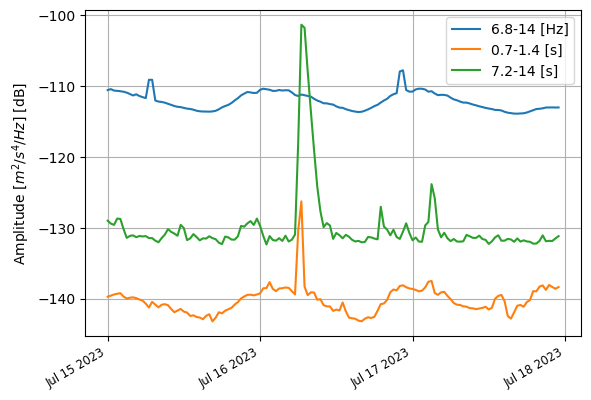

In [46]:
# define start and end time
t1 = UTCDateTime(2023, 7, 15)  # Start time
t2 = UTCDateTime(2023, 7, 18)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'
stas = ['ZE.2303..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# merge traces - avoids duplicates
S.merge(method=1)

print('Resampling')
S.resample(50)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

psd_values = ppsd.psd_values
print("shape of psd values: ", np.shape(psd_values))
print(psd_values[0:1]) # first branch

# plotting time series of PSD values
ppsd.plot_temporal([0.1,1,10])


ZE.2303..GPZ
length of trace: 30240001
Resampling
done
traces added
Data accumulated for 3-day period starting from 2023-07-16T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 7, 16, 0, 0), UTCDateTime(2023, 7, 16, 0, 30), UTCDateTime(2023, 7, 16, 1, 0), UTCDateTime(2023, 7, 16, 1, 30), UTCDateTime(2023, 7, 16, 2, 0), UTCDateTime(2023, 7, 16, 2, 30), UTCDateTime(2023, 7, 16, 3, 0), UTCDateTime(2023, 7, 16, 3, 30), UTCDateTime(2023, 7, 16, 4, 0), UTCDateTime(2023, 7, 16, 4, 30)]




<Figure size 1000x600 with 0 Axes>

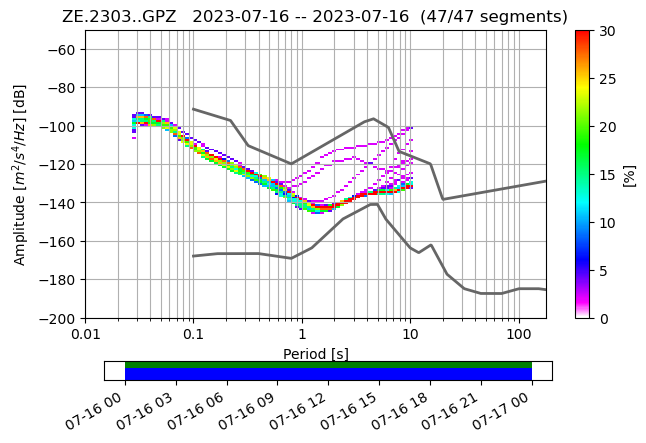

shape of psd values:  (47, 69)


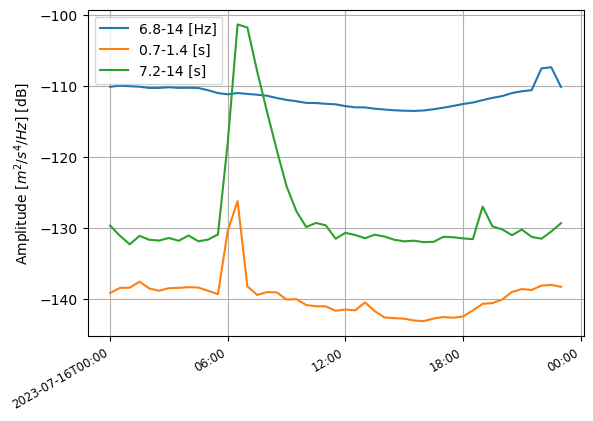

In [50]:
# define start and end time
t1 = UTCDateTime(2023, 7, 16)  # Start time
t2 = UTCDateTime(2023, 7, 17)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'
stas = ['ZE.2303..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# merge traces - avoids duplicates
S.merge(method=1)

print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

psd_values = ppsd.psd_values
print("shape of psd values: ", np.shape(psd_values))
#print(psd_values[0:1]) # first branch

# plotting time series of PSD values
ppsd.plot_temporal([0.1,1,10])

ZE.2303..GPZ
length of trace: 90720001
Resampling
done
traces added
Data accumulated for 3-day period starting from 2023-07-18T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 7, 18, 0, 0), UTCDateTime(2023, 7, 18, 0, 30), UTCDateTime(2023, 7, 18, 1, 0), UTCDateTime(2023, 7, 18, 1, 30), UTCDateTime(2023, 7, 18, 2, 0), UTCDateTime(2023, 7, 18, 2, 30), UTCDateTime(2023, 7, 18, 3, 0), UTCDateTime(2023, 7, 18, 3, 30), UTCDateTime(2023, 7, 18, 4, 0), UTCDateTime(2023, 7, 18, 4, 30)]




<Figure size 1000x600 with 0 Axes>

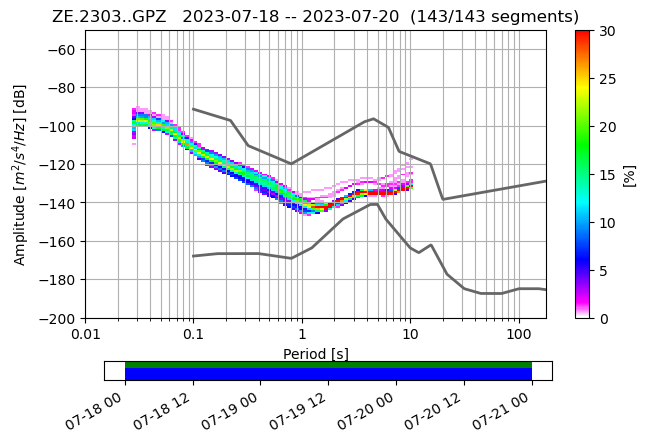

In [12]:
# define start and end time
t1 = UTCDateTime(2023, 7, 18)  # Start time
t2 = UTCDateTime(2023, 7, 21)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'
stas = ['ZE.2303..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# merge traces - avoids duplicates
S.merge(method=1)

print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

ZE.2303..GPZ
length of trace: 90720001
Resampling
done
traces added
Data accumulated for 3-day period starting from 2023-07-21T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 7, 21, 0, 0), UTCDateTime(2023, 7, 21, 0, 30), UTCDateTime(2023, 7, 21, 1, 0), UTCDateTime(2023, 7, 21, 1, 30), UTCDateTime(2023, 7, 21, 2, 0), UTCDateTime(2023, 7, 21, 2, 30), UTCDateTime(2023, 7, 21, 3, 0), UTCDateTime(2023, 7, 21, 3, 30), UTCDateTime(2023, 7, 21, 4, 0), UTCDateTime(2023, 7, 21, 4, 30)]




<Figure size 1000x600 with 0 Axes>

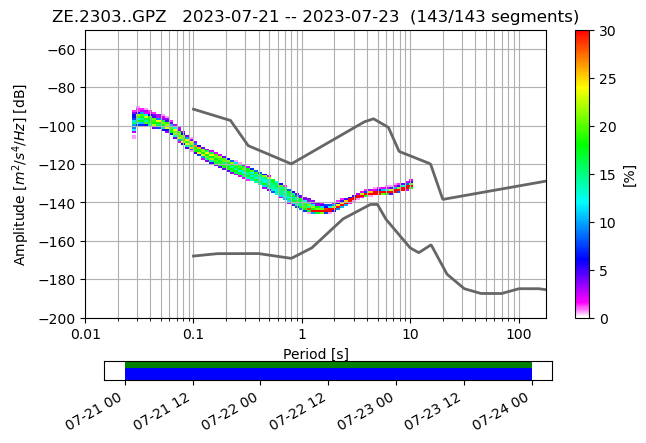

shape of psd values:  (143, 69)
[array([ -93.26454 ,  -90.76674 ,  -91.18457 ,  -91.68148 ,  -92.4215  ,
        -93.225235,  -94.06067 ,  -94.83771 ,  -95.62103 ,  -97.364265,
        -99.28467 , -101.33775 , -103.2966  , -105.16525 , -106.86393 ,
       -108.48775 , -110.00628 , -111.40521 , -112.62255 , -113.708954,
       -114.6809  , -115.61224 , -116.54292 , -117.45838 , -118.20463 ,
       -118.988434, -119.7929  , -120.604904, -121.54983 , -122.42902 ,
       -123.32374 , -124.34951 , -125.54108 , -126.684006, -128.12584 ,
       -129.54308 , -130.89005 , -132.36154 , -133.89845 , -135.39908 ,
       -136.82373 , -138.4174  , -139.74263 , -140.91399 , -141.78226 ,
       -142.47456 , -142.95544 , -143.06587 , -142.8616  , -142.19498 ,
       -141.18024 , -140.05952 , -139.15543 , -138.14027 , -137.2336  ,
       -136.408   , -135.71205 , -135.2821  , -135.34305 , -135.32744 ,
       -135.36751 , -135.32033 , -135.2547  , -134.91138 , -134.22513 ,
       -133.66254 , -132.70847 

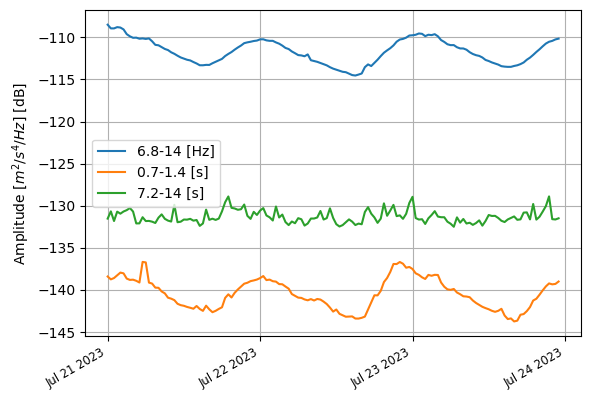

In [48]:
# define start and end time
t1 = UTCDateTime(2023, 7, 21)  # Start time
t2 = UTCDateTime(2023, 7, 24)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'
stas = ['ZE.2303..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# merge traces - avoids duplicates
S.merge(method=1)

print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

psd_values = ppsd.psd_values
print("shape of psd values: ", np.shape(psd_values))
print(psd_values[0:1]) # first branch

# plotting time series of PSD values
ppsd.plot_temporal([0.1,1,10])


In [47]:
print('Precipitation July 24 - plot of single day further below')

Precipitation July 24 - plot of single day further below


ZE.2303..GPZ
length of trace: 90720001
Resampling
done
traces added
Data accumulated for 3-day period starting from 2023-07-24T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 7, 24, 0, 0), UTCDateTime(2023, 7, 24, 0, 30), UTCDateTime(2023, 7, 24, 1, 0), UTCDateTime(2023, 7, 24, 1, 30), UTCDateTime(2023, 7, 24, 2, 0), UTCDateTime(2023, 7, 24, 2, 30), UTCDateTime(2023, 7, 24, 3, 0), UTCDateTime(2023, 7, 24, 3, 30), UTCDateTime(2023, 7, 24, 4, 0), UTCDateTime(2023, 7, 24, 4, 30)]




<Figure size 1000x600 with 0 Axes>

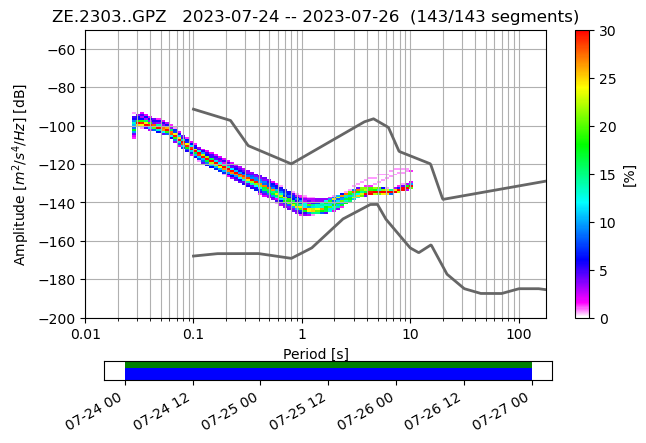

In [8]:
# define start and end time
t1 = UTCDateTime(2023, 7, 24)  # Start time
t2 = UTCDateTime(2023, 7, 27)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'
stas = ['ZE.2303..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# merge traces - avoids duplicates
S.merge(method=1)

print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

ZE.2303..GPZ
Resampling
done
traces added
Data accumulated for 3-day period starting from 2023-07-28T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 7, 28, 0, 0), UTCDateTime(2023, 7, 28, 0, 30), UTCDateTime(2023, 7, 28, 1, 0), UTCDateTime(2023, 7, 28, 1, 30), UTCDateTime(2023, 7, 28, 2, 0), UTCDateTime(2023, 7, 28, 2, 30), UTCDateTime(2023, 7, 28, 3, 0), UTCDateTime(2023, 7, 28, 3, 30), UTCDateTime(2023, 7, 28, 4, 0), UTCDateTime(2023, 7, 28, 4, 30)]




<Figure size 1000x600 with 0 Axes>

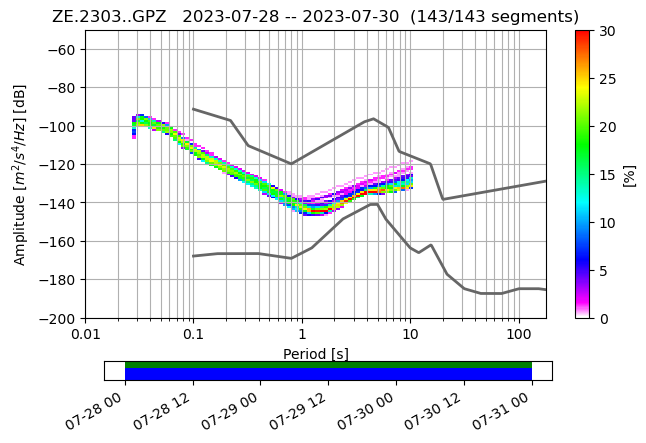

In [18]:
# define start and end time
t1 = UTCDateTime(2023, 7, 28)  # Start time
t2 = UTCDateTime(2023, 7, 31)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'
stas = ['ZE.2303..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# merge traces - avoids duplicates
S.merge(method=1)

print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

ZE.2303..GPZ
length of trace: 90720001
Resampling
done
traces added
Data accumulated for 3-day period starting from 2023-08-06T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 8, 6, 0, 0), UTCDateTime(2023, 8, 6, 0, 30), UTCDateTime(2023, 8, 6, 1, 0), UTCDateTime(2023, 8, 6, 1, 30), UTCDateTime(2023, 8, 6, 2, 0), UTCDateTime(2023, 8, 6, 2, 30), UTCDateTime(2023, 8, 6, 3, 0), UTCDateTime(2023, 8, 6, 3, 30), UTCDateTime(2023, 8, 6, 4, 0), UTCDateTime(2023, 8, 6, 4, 30)]




<Figure size 1000x600 with 0 Axes>

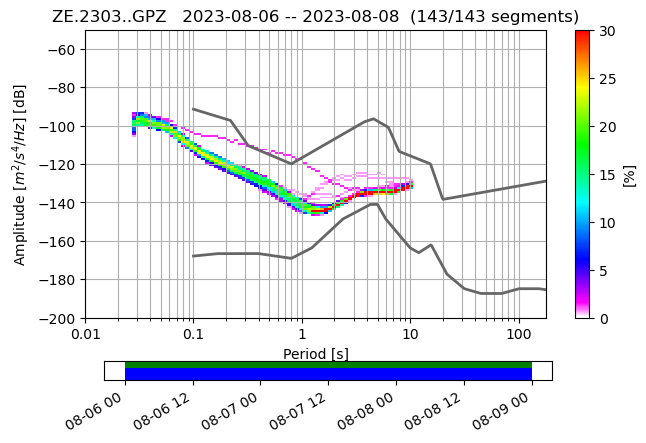

In [9]:
# define start and end time
t1 = UTCDateTime(2023, 8, 6)  # Start time
t2 = UTCDateTime(2023, 8, 9)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'
stas = ['ZE.2303..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# merge traces - avoids duplicates
S.merge(method=1)

print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

ZE.2303..GPZ
length of trace: 90720001
Resampling
done
traces added
Data accumulated for 3-day period starting from 2023-08-09T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 8, 9, 0, 0), UTCDateTime(2023, 8, 9, 0, 30), UTCDateTime(2023, 8, 9, 1, 0), UTCDateTime(2023, 8, 9, 1, 30), UTCDateTime(2023, 8, 9, 2, 0), UTCDateTime(2023, 8, 9, 2, 30), UTCDateTime(2023, 8, 9, 3, 0), UTCDateTime(2023, 8, 9, 3, 30), UTCDateTime(2023, 8, 9, 4, 0), UTCDateTime(2023, 8, 9, 4, 30)]




<Figure size 1000x600 with 0 Axes>

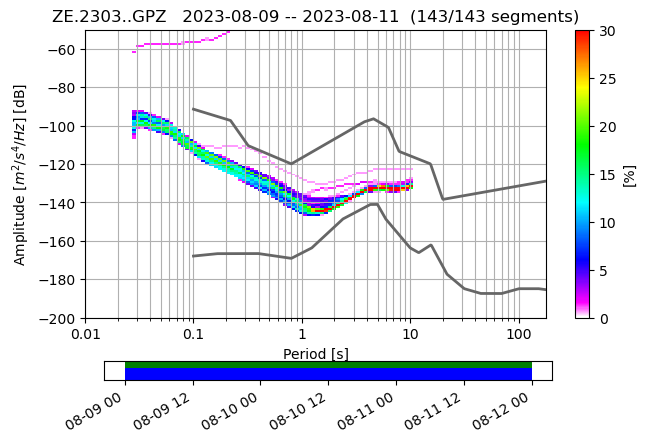

In [10]:
# define start and end time
t1 = UTCDateTime(2023, 8, 9)  # Start time
t2 = UTCDateTime(2023, 8, 12)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'
stas = ['ZE.2303..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# merge traces - avoids duplicates
S.merge(method=1)

print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

In [20]:
print("""Days of Precipitation at Paradise""")
print("7/24 - 0.22 in - plotted above, only for 2303 and 2304") # have data for 2303 and 2304 and plotted, not existing for 2302
print("8/29-8/31 - 0.25, 0.14, 0.73 in") # retrieving data for 2303, need data for 2302 and 2304
print("8/29 - 0.25 in")
print("8/30 - 0.14 in")
print("8/31 - 0.73 in **max day in timeframe for 2302, 2303, 2304")
print("9/4 - 0.25 in") # need data for 2302, 2303, 2304

Days of Precipitation at Paradise
7/24 - 0.22 in - plotted above, only for 2303 and 2304
8/29-8/31 - 0.25, 0.14, 0.73 in
8/29 - 0.25 in
8/30 - 0.14 in
8/31 - 0.73 in **max day in timeframe for 2302, 2303, 2304
9/4 - 0.25 in


In [7]:
print('Keep in mind that the meterology website is in PDT/PST so when using times to make specific weather-based PPSD plots,')
print('the time entered into t1, t2 are UTC so should add 8 hours to desired local time before inputting')

Keep in mind that the meterology website is in PDT/PST so when using times to make specific weather-based PPSD plots,
the time entered into t1, t2 are UTC so should add 8 hours to desired local time before inputting


July 24 - Precipitation Day of 0.22 in


ZE.2303..GPZ
length of trace: 30240001
Resampling
done
traces added
Data accumulated for 1-day period on 2023-07-24T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 7, 24, 0, 0), UTCDateTime(2023, 7, 24, 0, 30), UTCDateTime(2023, 7, 24, 1, 0), UTCDateTime(2023, 7, 24, 1, 30), UTCDateTime(2023, 7, 24, 2, 0), UTCDateTime(2023, 7, 24, 2, 30), UTCDateTime(2023, 7, 24, 3, 0), UTCDateTime(2023, 7, 24, 3, 30), UTCDateTime(2023, 7, 24, 4, 0), UTCDateTime(2023, 7, 24, 4, 30)]




<Figure size 1000x600 with 0 Axes>

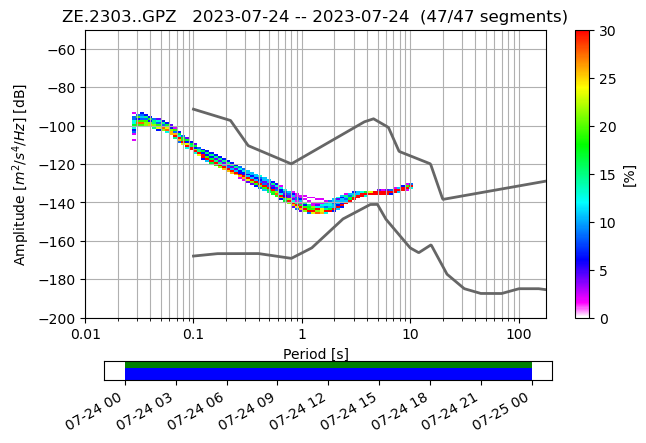

shape of psd values:  (47, 69)
[array([-101.47255 ,  -94.1906  ,  -93.58165 ,  -94.63121 ,  -95.38325 ,
        -96.17859 ,  -96.94244 ,  -97.643074,  -98.36711 ,  -99.906204,
       -101.954025, -103.564995, -105.26102 , -106.84138 , -108.341446,
       -109.83108 , -111.16862 , -112.47394 , -113.68256 , -114.83745 ,
       -115.87453 , -116.898674, -117.91465 , -118.86358 , -119.7568  ,
       -120.5456  , -121.38131 , -122.224464, -123.17643 , -124.15356 ,
       -125.12002 , -126.149994, -127.19376 , -128.42357 , -129.62964 ,
       -130.87006 , -132.07622 , -133.39066 , -134.75586 , -136.06259 ,
       -137.40504 , -138.69197 , -140.09268 , -141.40756 , -142.64015 ,
       -143.43738 , -143.90967 , -144.086   , -143.9304  , -143.38385 ,
       -142.61034 , -141.64403 , -140.48521 , -139.2307  , -137.99641 ,
       -137.0604  , -136.26393 , -135.62688 , -135.13483 , -134.80173 ,
       -134.72122 , -134.49968 , -134.48013 , -134.15675 , -133.80481 ,
       -133.26479 , -132.71144 ,

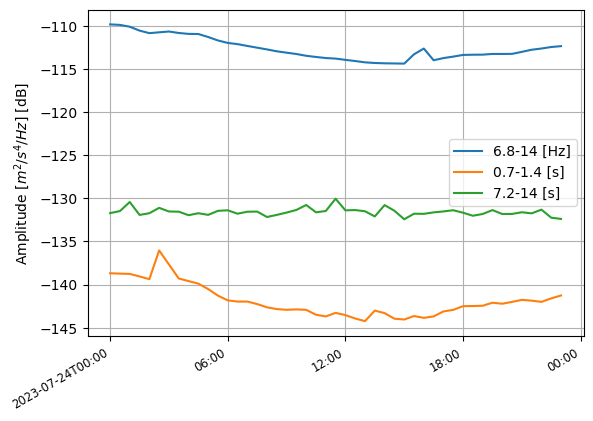

In [37]:
print('July 24 - Precipitation Day of 0.22 in')
print('\n')

# define start and end time
t1 = UTCDateTime(2023, 7, 24)  # Start time
t2 = UTCDateTime(2023, 7, 25)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'
stas = ['ZE.2303..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# merge traces - avoids duplicates
S.merge(method=1)

print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 1-day period on {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

psd_values = ppsd.psd_values
print("shape of psd values: ", np.shape(psd_values))
print(psd_values[0:1]) # first branch

# plotting time series of PSD values
ppsd.plot_temporal([0.1,1,10])


August 29-31, 3 day PPSD, Precipiation Day of avg ~0.37 in


ZE.2303..GPZ
length of trace: 90720000
Resampling
done
traces added
Data accumulated for 3-day period starting from 2023-08-29T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 8, 29, 0, 0), UTCDateTime(2023, 8, 29, 0, 30), UTCDateTime(2023, 8, 29, 1, 0), UTCDateTime(2023, 8, 29, 1, 30), UTCDateTime(2023, 8, 29, 2, 0), UTCDateTime(2023, 8, 29, 2, 30), UTCDateTime(2023, 8, 29, 3, 0), UTCDateTime(2023, 8, 29, 3, 30), UTCDateTime(2023, 8, 29, 4, 0), UTCDateTime(2023, 8, 29, 4, 30)]




<Figure size 1000x600 with 0 Axes>

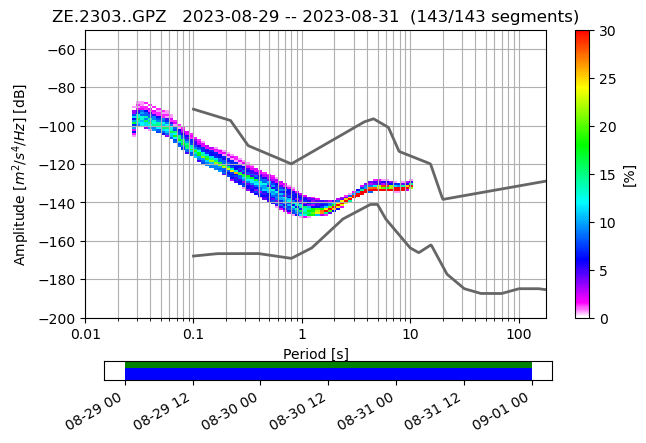

In [29]:
print('August 29-31, 3 day PPSD, Precipiation Day of avg ~0.37 in')
print('\n')

# define start and end time
t1 = UTCDateTime(2023, 8, 29)  # Start time
t2 = UTCDateTime(2023, 9, 1)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'
stas = ['ZE.2303..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# merge traces - avoids duplicates
S.merge(method=1)

print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

August 29 - Precipitation Day of 0.25 in


ZE.2303..GPZ
length of trace: 30240001
Resampling
done
traces added
Data accumulated for 1-day period on 2023-08-29T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 8, 29, 0, 0), UTCDateTime(2023, 8, 29, 0, 30), UTCDateTime(2023, 8, 29, 1, 0), UTCDateTime(2023, 8, 29, 1, 30), UTCDateTime(2023, 8, 29, 2, 0), UTCDateTime(2023, 8, 29, 2, 30), UTCDateTime(2023, 8, 29, 3, 0), UTCDateTime(2023, 8, 29, 3, 30), UTCDateTime(2023, 8, 29, 4, 0), UTCDateTime(2023, 8, 29, 4, 30)]




<Figure size 1000x600 with 0 Axes>

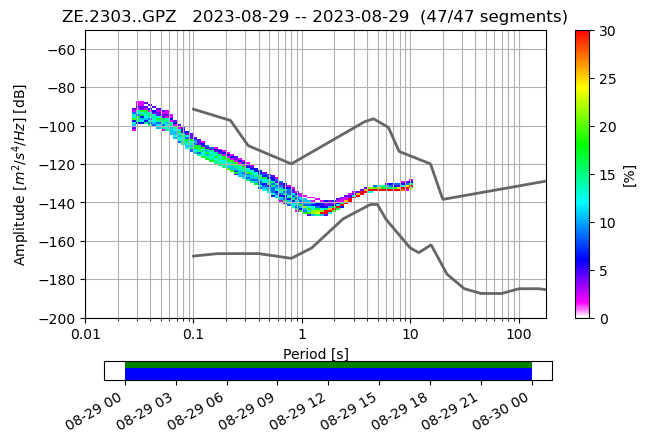

In [34]:
print('August 29 - Precipitation Day of 0.25 in')
print('\n')

# define start and end time
t1 = UTCDateTime(2023, 8, 29)  # Start time
t2 = UTCDateTime(2023, 8, 30)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'
stas = ['ZE.2303..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# merge traces - avoids duplicates
S.merge(method=1)

print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 1-day period on {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

August 30 - Precipitation Day of 0.14 in


ZE.2303..GPZ
length of trace: 30240001
Resampling
done
traces added
Data accumulated for 1-day period on 2023-08-30T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 8, 30, 0, 0), UTCDateTime(2023, 8, 30, 0, 30), UTCDateTime(2023, 8, 30, 1, 0), UTCDateTime(2023, 8, 30, 1, 30), UTCDateTime(2023, 8, 30, 2, 0), UTCDateTime(2023, 8, 30, 2, 30), UTCDateTime(2023, 8, 30, 3, 0), UTCDateTime(2023, 8, 30, 3, 30), UTCDateTime(2023, 8, 30, 4, 0), UTCDateTime(2023, 8, 30, 4, 30)]




<Figure size 1000x600 with 0 Axes>

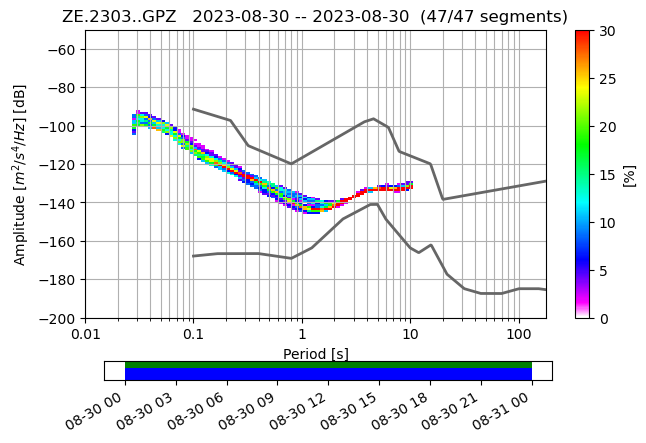

In [35]:
print('August 30 - Precipitation Day of 0.14 in')
print('\n')

# define start and end time
t1 = UTCDateTime(2023, 8, 30)  # Start time
t2 = UTCDateTime(2023, 8, 31)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'
stas = ['ZE.2303..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# merge traces - avoids duplicates
S.merge(method=1)

print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 1-day period on {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

August 31 - Max Precipitation Day of 0.73 in


ZE.2303..GPZ
length of trace: 30240000
Resampling
done
traces added
Data accumulated for 1-day period on 2023-08-31T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 8, 31, 0, 0), UTCDateTime(2023, 8, 31, 0, 30), UTCDateTime(2023, 8, 31, 1, 0), UTCDateTime(2023, 8, 31, 1, 30), UTCDateTime(2023, 8, 31, 2, 0), UTCDateTime(2023, 8, 31, 2, 30), UTCDateTime(2023, 8, 31, 3, 0), UTCDateTime(2023, 8, 31, 3, 30), UTCDateTime(2023, 8, 31, 4, 0), UTCDateTime(2023, 8, 31, 4, 30)]




<Figure size 1000x600 with 0 Axes>

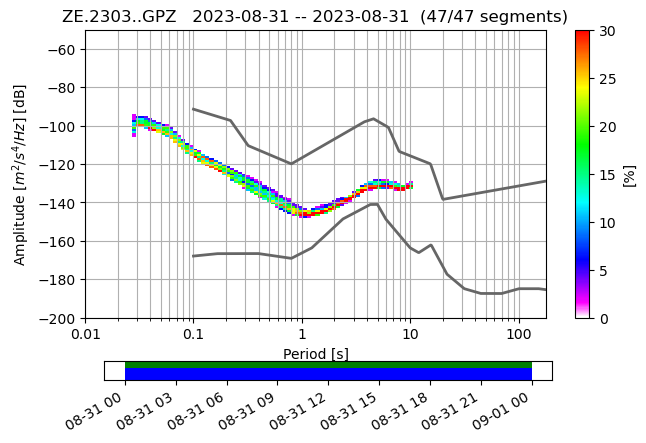

shape of psd values:  (47, 69)
[array([ -97.53686 ,  -95.25391 ,  -95.17699 ,  -95.43379 ,  -96.50953 ,
        -97.416   ,  -98.28439 ,  -99.09646 ,  -99.851204, -101.52545 ,
       -103.54251 , -105.72485 , -107.457756, -109.188835, -110.77935 ,
       -112.27253 , -113.71223 , -115.022156, -116.20547 , -117.31381 ,
       -118.31721 , -119.27577 , -120.26549 , -121.26978 , -122.25985 ,
       -123.27188 , -124.386024, -125.472694, -126.58935 , -127.67388 ,
       -128.79805 , -129.93318 , -131.04947 , -132.28377 , -133.44595 ,
       -134.7091  , -136.04741 , -137.50229 , -138.89452 , -140.23425 ,
       -141.52888 , -142.64178 , -143.64534 , -144.25296 , -144.5645  ,
       -144.46863 , -144.25662 , -143.79997 , -143.21751 , -142.3618  ,
       -141.29213 , -140.14082 , -139.03484 , -137.94421 , -136.72154 ,
       -135.41316 , -133.89183 , -133.0574  , -132.60901 , -132.42833 ,
       -132.03358 , -131.69102 , -131.6785  , -132.0262  , -132.67354 ,
       -132.58138 , -132.14029 ,

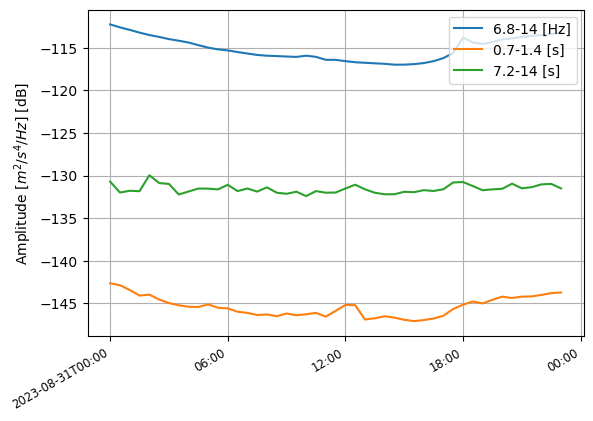

In [39]:
print('August 31 - Max Precipitation Day of 0.73 in')
print('\n')

# define start and end time
t1 = UTCDateTime(2023, 8, 31)  # Start time
t2 = UTCDateTime(2023, 9, 1)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'
stas = ['ZE.2303..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# merge traces - avoids duplicates
S.merge(method=1)

print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 1-day period on {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

psd_values = ppsd.psd_values
print("shape of psd values: ", np.shape(psd_values))
print(psd_values[0:1]) # first branch

# plotting time series of PSD values
ppsd.plot_temporal([0.1,1,10])


September 4 - Precipitation Day of 0.25 in


ZE.2303..GPZ
length of trace: 30240001
Resampling
done
traces added
Data accumulated for 1-day period starting on 2023-09-04T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 9, 4, 0, 0), UTCDateTime(2023, 9, 4, 0, 30), UTCDateTime(2023, 9, 4, 1, 0), UTCDateTime(2023, 9, 4, 1, 30), UTCDateTime(2023, 9, 4, 2, 0), UTCDateTime(2023, 9, 4, 2, 30), UTCDateTime(2023, 9, 4, 3, 0), UTCDateTime(2023, 9, 4, 3, 30), UTCDateTime(2023, 9, 4, 4, 0), UTCDateTime(2023, 9, 4, 4, 30)]




<Figure size 1000x600 with 0 Axes>

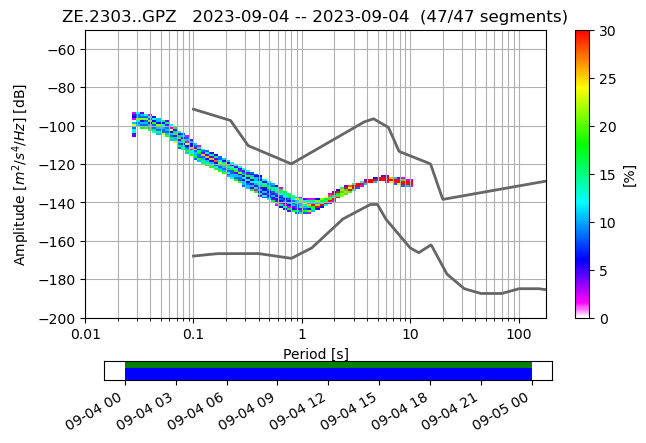

In [52]:
print('September 4 - Precipitation Day of 0.25 in')
print('\n')

# define start and end time
t1 = UTCDateTime(2023, 9, 4)  # Start time
t2 = UTCDateTime(2023, 9, 5)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2303'
stas = ['ZE.2303..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# merge traces - avoids duplicates
S.merge(method=1)

print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 1-day period starting on {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")



In [9]:
print("""ZE 2302 GPZ""")

ZE 2302 GPZ


ZE.2302..GPZ
length of trace: 855000
Resampling


C:\Users\zzawol\AppData\Local\miniforge3\envs\obspy-env\Lib\site-packages\obspy\core\trace.py:1752: UserWarning: Resampled trace would have less than one sample. Retaining exactly one sample.
  warnings.warn(msg)


done
traces added
Data accumulated for 3-day period starting from 2023-08-10T21:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 8, 10, 21, 0), UTCDateTime(2023, 8, 10, 21, 30), UTCDateTime(2023, 8, 10, 22, 0), UTCDateTime(2023, 8, 10, 22, 30), UTCDateTime(2023, 8, 10, 23, 0), UTCDateTime(2023, 8, 10, 23, 30), UTCDateTime(2023, 8, 11, 0, 0), UTCDateTime(2023, 8, 11, 0, 30), UTCDateTime(2023, 8, 11, 1, 0), UTCDateTime(2023, 8, 11, 1, 30)]




<Figure size 1000x600 with 0 Axes>

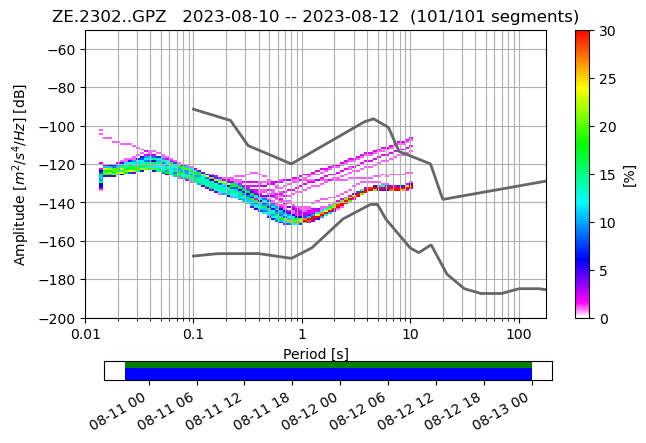

In [8]:
# define start and end time
t1 = UTCDateTime(2023, 8, 10, 21)  # Start time
t2 = UTCDateTime(2023, 8, 13)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2302'
stas = ['ZE.2302..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# for tr in S:
    # if tr.stats.npts == 0:
    #     print(f"Trace {trace.id} has zero duration. Investigate data source.")
    # # Get the sampling rate
    # sampling_rate = tr.stats.sampling_rate
    # print(f"Sampling Rate: {sampling_rate} Hz")
    # print(f"Trace duration: {tr.stats.endtime - tr.stats.starttime}")
    # tr.resample(50)#, minimum_length=trace.stats.npts)
    
print('length of trace:', len(S[0]))
print('Resampling')
S.resample(100)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

# merge traces - avoids duplicates
S.merge(method=1)

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

ZE.2302..GPZ
length of trace: 855000
Resampling


C:\Users\zzawol\AppData\Local\miniforge3\envs\obspy-env\Lib\site-packages\obspy\core\trace.py:1752: UserWarning: Resampled trace would have less than one sample. Retaining exactly one sample.
  warnings.warn(msg)


done
traces added
Data accumulated for 3-day period starting from 2023-08-10T21:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 8, 10, 21, 0), UTCDateTime(2023, 8, 10, 21, 30), UTCDateTime(2023, 8, 10, 22, 0), UTCDateTime(2023, 8, 10, 22, 30), UTCDateTime(2023, 8, 10, 23, 0), UTCDateTime(2023, 8, 10, 23, 30), UTCDateTime(2023, 8, 11, 0, 0), UTCDateTime(2023, 8, 11, 0, 30), UTCDateTime(2023, 8, 11, 1, 0), UTCDateTime(2023, 8, 11, 1, 30)]




<Figure size 1000x600 with 0 Axes>

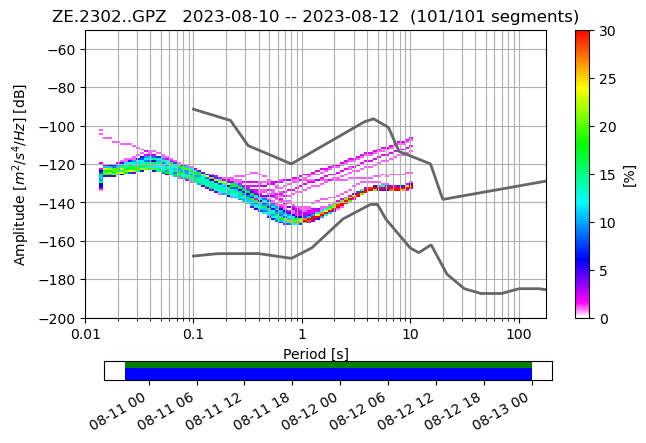

In [5]:
# define start and end time
t1 = UTCDateTime(2023, 8, 10, 21)  # Start time
t2 = UTCDateTime(2023, 8, 13)  # End time
delta = 1800  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2302'
stas = ['ZE.2302..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# for tr in S:
    # if tr.stats.npts == 0:
    #     print(f"Trace {trace.id} has zero duration. Investigate data source.")
    # # Get the sampling rate
    # sampling_rate = tr.stats.sampling_rate
    # print(f"Sampling Rate: {sampling_rate} Hz")
    # print(f"Trace duration: {tr.stats.endtime - tr.stats.starttime}")
    # tr.resample(50)#, minimum_length=trace.stats.npts)
    
print('length of trace:', len(S[0]))
print('Resampling')
S.resample(100)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

# merge traces - avoids duplicates
S.merge(method=1)

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

ZE.2302..GPZ


C:\Users\zzawol\AppData\Local\miniforge3\envs\obspy-env\Lib\site-packages\obspy\clients\fdsn\wadl_parser.py:107: UserWarning: The 'event' service at 'http://service.iris.edu/ph5/event/1/' cannot deal with the following required parameters: mindepth, maxdepth, orderby
They will not be available for any requests. Any attempt to use them will result in an error.
  warnings.warn(msg)


length of trace: 12
Resampling


C:\Users\zzawol\AppData\Local\miniforge3\envs\obspy-env\Lib\site-packages\obspy\core\trace.py:1752: UserWarning: Resampled trace would have less than one sample. Retaining exactly one sample.
  warnings.warn(msg)


done
traces added
Data accumulated for 3-day period starting from 2023-08-13T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 8, 13, 0, 0), UTCDateTime(2023, 8, 13, 0, 30), UTCDateTime(2023, 8, 13, 1, 0), UTCDateTime(2023, 8, 13, 1, 30), UTCDateTime(2023, 8, 13, 2, 0), UTCDateTime(2023, 8, 13, 2, 30), UTCDateTime(2023, 8, 13, 3, 0), UTCDateTime(2023, 8, 13, 3, 30), UTCDateTime(2023, 8, 13, 4, 0), UTCDateTime(2023, 8, 13, 4, 30)]




<Figure size 1000x600 with 0 Axes>

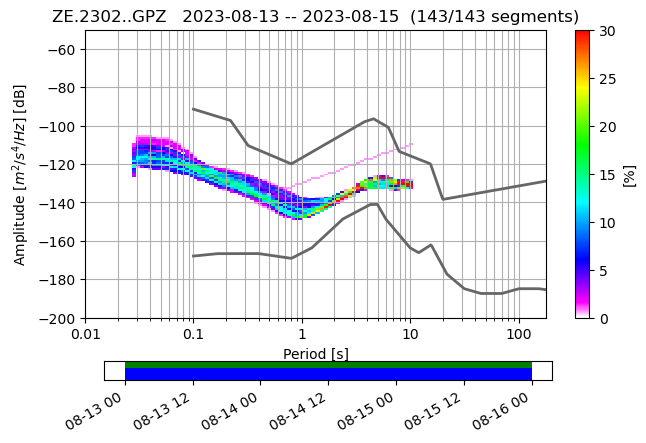

In [3]:
# define start and end time
t1 = UTCDateTime(2023, 8, 13)  # Start time
t2 = UTCDateTime(2023, 8, 16)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2302'
stas = ['ZE.2302..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# print('length of trace:', len(S[0]))
# if len(S[0]) >= 50 * (tr.stats.endtime - tr.stats.starttime):  # 50 samples per second * # of sec
#     print('Resampling')
#     S.resample(50) # Resampled rate for final analysis. Note: Consider Nyquist criterion
# else:
#     print("Trace too short for resampling at 50 Hz")

print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50) # Resampled rate for final analysis. Note: Consider Nyquist criterion

# merge traces - avoids duplicates
S.merge(method=1)

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

ZE.2302..GPZ
length of trace: 12
Resampling


C:\Users\zzawol\AppData\Local\miniforge3\envs\obspy-env\Lib\site-packages\obspy\core\trace.py:1752: UserWarning: Resampled trace would have less than one sample. Retaining exactly one sample.
  warnings.warn(msg)


done
traces added
Data accumulated for 3-day period starting from 2023-08-13T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 8, 13, 0, 0), UTCDateTime(2023, 8, 13, 0, 30), UTCDateTime(2023, 8, 13, 1, 0), UTCDateTime(2023, 8, 13, 1, 30), UTCDateTime(2023, 8, 13, 2, 0), UTCDateTime(2023, 8, 13, 2, 30), UTCDateTime(2023, 8, 13, 3, 0), UTCDateTime(2023, 8, 13, 3, 30), UTCDateTime(2023, 8, 13, 4, 0), UTCDateTime(2023, 8, 13, 4, 30)]




<Figure size 1000x600 with 0 Axes>

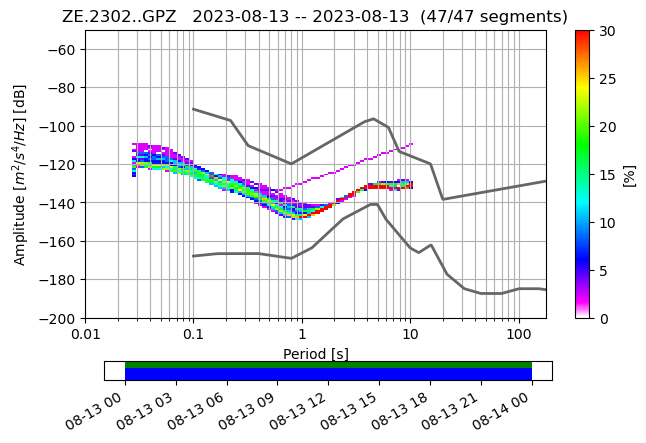

In [6]:
# define start and end time
t1 = UTCDateTime(2023, 8, 13)  # Start time
t2 = UTCDateTime(2023, 8, 14)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2302'
stas = ['ZE.2302..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# print('length of trace:', len(S[0]))
# if len(S[0]) >= 50 * (tr.stats.endtime - tr.stats.starttime):  # 50 samples per second * # of sec
#     print('Resampling')
#     S.resample(50) # Resampled rate for final analysis. Note: Consider Nyquist criterion
# else:
#     print("Trace too short for resampling at 50 Hz")

print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50) # Resampled rate for final analysis. Note: Consider Nyquist criterion

# merge traces - avoids duplicates
S.merge(method=1)

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

ZE.2302..GPZ
length of trace: 630000
Resampling


C:\Users\zzawol\AppData\Local\miniforge3\envs\obspy-env\Lib\site-packages\obspy\core\trace.py:1752: UserWarning: Resampled trace would have less than one sample. Retaining exactly one sample.
  warnings.warn(msg)


done
traces added
Data accumulated for 3-day period starting from 2023-08-14T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 8, 14, 0, 0), UTCDateTime(2023, 8, 14, 0, 30), UTCDateTime(2023, 8, 14, 1, 0), UTCDateTime(2023, 8, 14, 1, 30), UTCDateTime(2023, 8, 14, 2, 0), UTCDateTime(2023, 8, 14, 2, 30), UTCDateTime(2023, 8, 14, 3, 0), UTCDateTime(2023, 8, 14, 3, 30), UTCDateTime(2023, 8, 14, 4, 0), UTCDateTime(2023, 8, 14, 4, 30)]




<Figure size 1000x600 with 0 Axes>

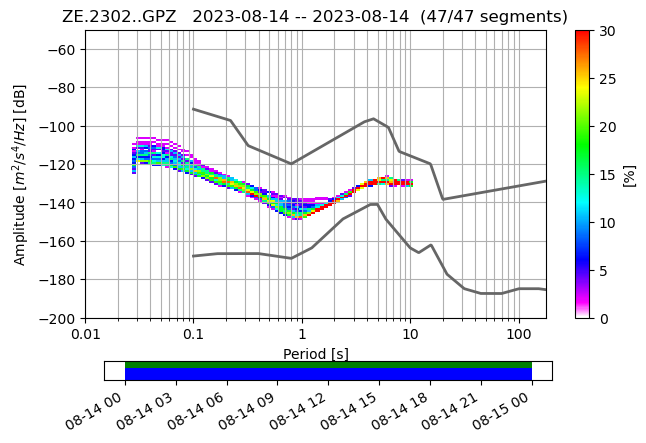

In [7]:
# define start and end time
t1 = UTCDateTime(2023, 8, 14)  # Start time
t2 = UTCDateTime(2023, 8, 15)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2302'
stas = ['ZE.2302..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# print('length of trace:', len(S[0]))
# if len(S[0]) >= 50 * (tr.stats.endtime - tr.stats.starttime):  # 50 samples per second * # of sec
#     print('Resampling')
#     S.resample(50) # Resampled rate for final analysis. Note: Consider Nyquist criterion
# else:
#     print("Trace too short for resampling at 50 Hz")

print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50) # Resampled rate for final analysis. Note: Consider Nyquist criterion

# merge traces - avoids duplicates
S.merge(method=1)

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

ZE.2302..GPZ
Resampling
done
traces added
Data accumulated for 3-day period starting from 2023-08-15T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 8, 15, 0, 0), UTCDateTime(2023, 8, 15, 0, 30), UTCDateTime(2023, 8, 15, 1, 0), UTCDateTime(2023, 8, 15, 1, 30), UTCDateTime(2023, 8, 15, 2, 0), UTCDateTime(2023, 8, 15, 2, 30), UTCDateTime(2023, 8, 15, 3, 0), UTCDateTime(2023, 8, 15, 3, 30), UTCDateTime(2023, 8, 15, 4, 0), UTCDateTime(2023, 8, 15, 4, 30)]




<Figure size 1000x600 with 0 Axes>

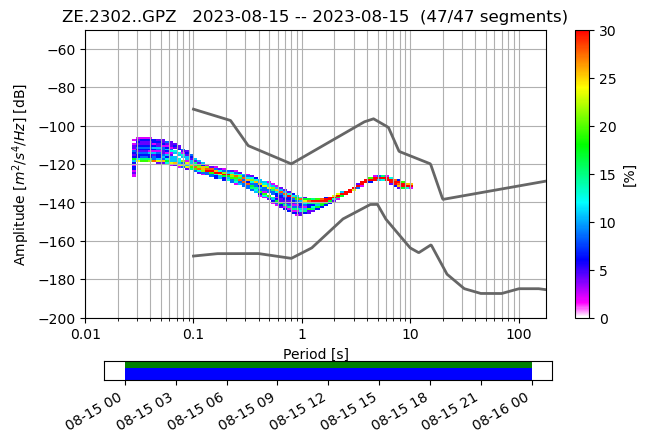

In [9]:
# define start and end time
t1 = UTCDateTime(2023, 8, 15)  # Start time
t2 = UTCDateTime(2023, 8, 16)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2302'
stas = ['ZE.2302..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# merge traces - avoids duplicates
S.merge(method=1)

#print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

ZE.2302..GPZ
length of trace: 630000
Trace too short for resampling at 50 Hz
done
traces added
Data accumulated for 3-day period starting from 2023-08-16T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 8, 16, 0, 0), UTCDateTime(2023, 8, 16, 0, 30), UTCDateTime(2023, 8, 16, 1, 0), UTCDateTime(2023, 8, 16, 1, 30), UTCDateTime(2023, 8, 16, 2, 0), UTCDateTime(2023, 8, 16, 2, 30), UTCDateTime(2023, 8, 16, 3, 0), UTCDateTime(2023, 8, 16, 3, 30), UTCDateTime(2023, 8, 16, 4, 0), UTCDateTime(2023, 8, 16, 4, 30)]




<Figure size 1000x600 with 0 Axes>

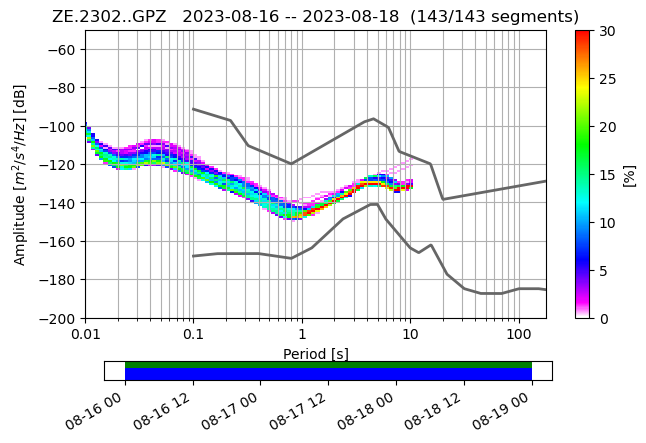

In [28]:
# define start and end time
t1 = UTCDateTime(2023, 8, 16)  # Start time
t2 = UTCDateTime(2023, 8, 19)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2302'
stas = ['ZE.2302..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

print('length of trace:', len(S[0]))
if len(S[0]) >= 50 * (tr.stats.endtime - tr.stats.starttime):  # 50 samples per second * # of sec
    print('Resampling')
    S.resample(50) # Resampled rate for final analysis. Note: Consider Nyquist criterion
else:
    print("Trace too short for resampling at 50 Hz")

# merge traces - avoids duplicates
S.merge(method=1)

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

ZE.2302..GPZ
Resampling
length of trace: 90720001
done
Trace duration: 259199.98
Number of samples: 12960000
traces added
Data accumulated for 3-day period starting from 2023-08-19T00:00:00.000000Z to 2023-08-22T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 8, 19, 0, 0), UTCDateTime(2023, 8, 19, 0, 30), UTCDateTime(2023, 8, 19, 1, 0), UTCDateTime(2023, 8, 19, 1, 30), UTCDateTime(2023, 8, 19, 2, 0), UTCDateTime(2023, 8, 19, 2, 30), UTCDateTime(2023, 8, 19, 3, 0), UTCDateTime(2023, 8, 19, 3, 30), UTCDateTime(2023, 8, 19, 4, 0), UTCDateTime(2023, 8, 19, 4, 30)]




<Figure size 1000x600 with 0 Axes>

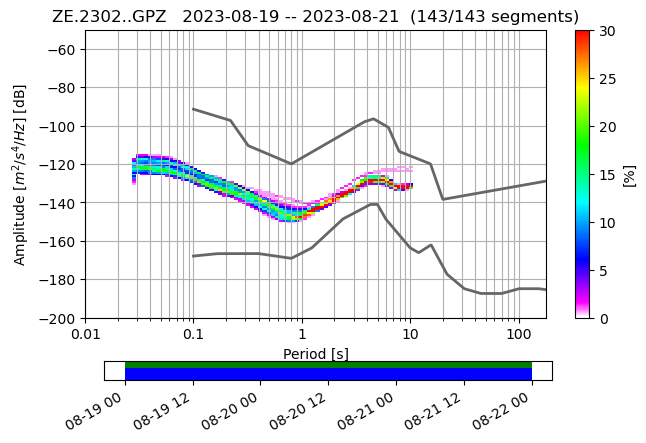

In [27]:
# define start and end time
t1 = UTCDateTime(2023, 8, 19)  # Start time
t2 = UTCDateTime(2023, 8, 22)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2302'
stas = ['ZE.2302..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

print('length of trace:', len(S[0]))
if len(S[0]) >= 50 * (tr.stats.endtime - tr.stats.starttime):  # 50 samples per second * # of sec
    print('Resampling')
    S.resample(50) # Resampled rate for final analysis. Note: Consider Nyquist criterion
else:
    print("Trace too short for resampling at 50 Hz")

# merge traces - avoids duplicates
S.merge(method=1)

print('done')

# create PPSD object
ppsd = None
for tr in S:
    print(f"Trace duration: {tr.stats.endtime - tr.stats.starttime}")
    print(f"Number of samples: {len(tr)}")
    
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1} to {t2}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")



ZE.2302..GPZ
length of trace: 630000
Trace too short for resampling at 50 Hz
done
Trace duration: 259200.0
Number of samples: 90720001
traces added
Data accumulated for 3-day period starting from 2023-08-19T00:00:00.000000Z to 2023-08-22T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 8, 19, 0, 0), UTCDateTime(2023, 8, 19, 0, 30), UTCDateTime(2023, 8, 19, 1, 0), UTCDateTime(2023, 8, 19, 1, 30), UTCDateTime(2023, 8, 19, 2, 0), UTCDateTime(2023, 8, 19, 2, 30), UTCDateTime(2023, 8, 19, 3, 0), UTCDateTime(2023, 8, 19, 3, 30), UTCDateTime(2023, 8, 19, 4, 0), UTCDateTime(2023, 8, 19, 4, 30)]




<Figure size 1000x600 with 0 Axes>

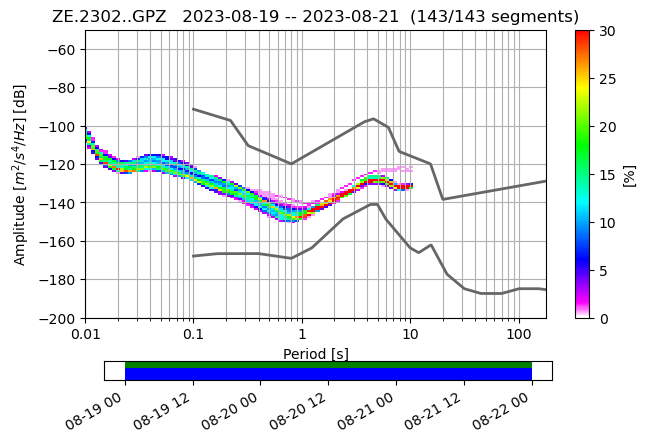

In [11]:
# define start and end time
t1 = UTCDateTime(2023, 8, 19)  # Start time
t2 = UTCDateTime(2023, 8, 22)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2302'
stas = ['ZE.2302..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

print('length of trace:', len(S[0]))
if len(S[0]) >= 50 * (tr.stats.endtime - tr.stats.starttime):  # 50 samples per second * # of sec
    print('Resampling')
    S.resample(50) # Resampled rate for final analysis. Note: Consider Nyquist criterion
else:
    print("Trace too short for resampling at 50 Hz")

# merge traces - avoids duplicates
S.merge(method=1)

print('done')

# create PPSD object
ppsd = None
for tr in S:
    print(f"Trace duration: {tr.stats.endtime - tr.stats.starttime}")
    print(f"Number of samples: {len(tr)}")
    
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1} to {t2}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")



ZE.2302..GPZ
Resampling
done
traces added
Data accumulated for 3-day period starting from 2023-08-19T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 8, 19, 0, 0), UTCDateTime(2023, 8, 19, 0, 30), UTCDateTime(2023, 8, 19, 1, 0), UTCDateTime(2023, 8, 19, 1, 30), UTCDateTime(2023, 8, 19, 2, 0), UTCDateTime(2023, 8, 19, 2, 30), UTCDateTime(2023, 8, 19, 3, 0), UTCDateTime(2023, 8, 19, 3, 30), UTCDateTime(2023, 8, 19, 4, 0), UTCDateTime(2023, 8, 19, 4, 30)]




<Figure size 1000x600 with 0 Axes>

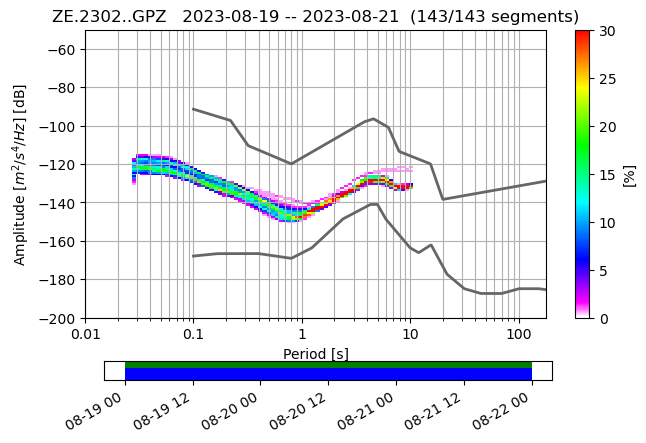

In [12]:
# define start and end time
t1 = UTCDateTime(2023, 8, 19)  # Start time
t2 = UTCDateTime(2023, 8, 22)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2302'
stas = ['ZE.2302..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# merge traces - avoids duplicates
S.merge(method=1)

#print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")

ZE.2302..GPZ
Resampling
done
traces added
Data accumulated for 3-day period starting from 2023-08-22T00:00:00.000000Z
First 3 days processed times: [UTCDateTime(2023, 8, 22, 0, 0), UTCDateTime(2023, 8, 22, 0, 30), UTCDateTime(2023, 8, 22, 1, 0), UTCDateTime(2023, 8, 22, 1, 30), UTCDateTime(2023, 8, 22, 2, 0), UTCDateTime(2023, 8, 22, 2, 30), UTCDateTime(2023, 8, 22, 3, 0), UTCDateTime(2023, 8, 22, 3, 30), UTCDateTime(2023, 8, 22, 4, 0), UTCDateTime(2023, 8, 22, 4, 30)]




<Figure size 1000x600 with 0 Axes>

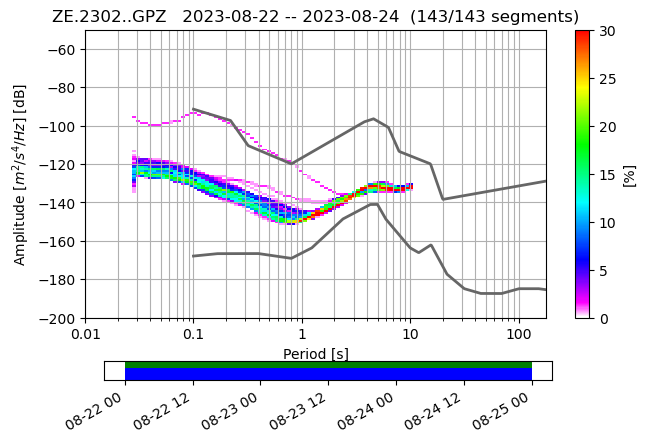

In [13]:
# define start and end time
t1 = UTCDateTime(2023, 8, 22)  # Start time
t2 = UTCDateTime(2023, 8, 25)  # End time
delta = 86400  # time in seconds, reduce to reduce file size

# define path where .mseed files are stored
path = 'C:/Users/zzawol/Documents/seismic-data-iris/seismic_data/NO2302'
stas = ['ZE.2302..GPZ']  # station id's actually used for resampling

# set station info
nowsta = stas[0]
network, station, location, channel = nowsta.split('.')
print(nowsta)

# read .mseed files from path
# assuming filenames follow the pattern 'ZE.2304..GPZ_YYYYMMDDTHHMMSS.mseed'
file_pattern = f'{path}/{network}.{station}.*.{channel}*.mseed'

# read data
S = obspy.read(file_pattern,starttime=t1,endtime=t2)

# set up metadata
client = Client("IRISPH5")
inv = client.get_stations(network=network, station=station, location=location, channel=channel, level='response')

# merge traces - avoids duplicates
S.merge(method=1)

#print('length of trace:', len(S[0]))
print('Resampling')
S.resample(50)  # Resampled rate for final analysis. Note: Consider Nyquist criterion

print('done')

# create PPSD object
ppsd = None
for tr in S:
    if ppsd is None:
        ppsd = PPSD(tr.stats, metadata=inv, period_limits=(0.01, 10.0))
    ppsd.add(tr)
    print('traces added')

# create PPSD object using the first trace
if ppsd is not None and len(ppsd.times_processed) > 0:
    print(f"Data accumulated for 3-day period starting from {t1}")
    print("First 3 days processed times:", ppsd.times_processed[:10])  # See first 10 times processed
    print('\n')
    # plot the PPSD
    plt.figure(figsize=(10, 6))
    ppsd.plot(cmap=pqlx)
    plt.show()
else:
    print(f"No data accumulated for the specified time window.")